![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

# NYC School Data Analysis

## Background
Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

## Objective
The objective of this project is to analyze data about the SAT performance of public schools in New York City (NYC) and find interesting insights.

## Data
The data used is a CSV file that contains information about the school name, borough, average math, reading, and writing SAT scores, and the number of students who took the SAT. The data is taken from this source.

## Method
The method used is as follows:
- Reading data from the CSV file using the Pandas library
- Calculating the total SAT score by adding up the scores in math, reading, and writing
- Filtering out schools with average math scores above 649
- Sorting schools by the highest total SAT score
- Calculating the average and standard deviation of the total SAT score for each borough
- Displaying the borough with the highest standard deviation of the total SAT score

## Results
The results of the data analysis are as follows:

- There are 10 schools with average math scores above 649, with the highest score being 754 from Stuyvesant High School
- The highest total SAT score is 2144 from Stuyvesant High School, and the lowest total SAT score is 887 from Bronx International High School
- Manhattan is the borough with the highest standard deviation of the total SAT score, which is 336.29. This indicates that there is a large variation between the total SAT scores of schools in Manhattan. The average total SAT score in Manhattan is 1346.13, which is higher than the NYC average, which is 1223.44

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
schools_math_8 = schools[schools["average_math"] >= 640]
best_math_schools = schools_math_8[["school_name", "average_math"]].sort_values("average_math", ascending=False)

# Make a new Column total_SAT
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# make a new DataFrame to store Top 10 School With Highest SAT Score
top_10_schools = schools[["school_name", "total_SAT"]].sort_values("total_SAT", ascending=False).head(10)

schools_SAT_data = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"])
largest_std_dev = schools_SAT_data.sort_values("std", ascending=False).head(3).round(2)
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

print(largest_std_dev)

               num_schools  average_SAT  std_SAT
borough                                         
Manhattan               89      1340.13   230.29
Staten Island           10      1439.00   222.30
Queens                  69      1345.48   195.25


## Summary
The output code shows that Staten Island has the highest average SAT score and the lowest number of schools, while Manhattan has the largest variation of SAT scores among the three boroughs in New York.

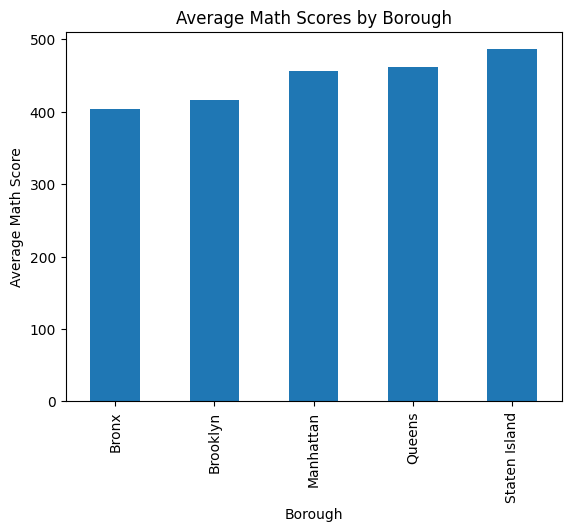

In [27]:
# Load the schools data from the CSV file
schools = pd.read_csv('schools.csv')

# Create a bar chart showing the average math scores of schools by borough
schools.groupby('borough')['average_math'].mean().plot(kind='bar', title='Average Math Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Math Score')
plt.show()